# Homework 2 : Dimensionality Reduction and Classification (face recognition) (100 points)

*------------

**Required Readings:** 
* The codes for [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/), [Nearest Neighbor](http://cs231n.github.io/classification/), [Face Recognition](http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html)


** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

# Problem 1 (50 points): PCA on face image dataset

* Load the Face Image dataset 

In [31]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
import sklearn
# download/load dataset
dataset = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# the images
X = dataset.data
# the label to predict is the id of the person
y = dataset.target

# statistics of the data
n_samples, h, w = dataset.images.shape
n_features = X.shape[1]
print("Total dataset size:")
print("n_images: %d" % n_samples)
print("n_features: %d" % n_features)


# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("training size: %d" % len(y_train))
print("test size: %d" % len(y_test))

Total dataset size:
n_images: 1288
n_features: 1850
training size: 966
test size: 322


## Compute PCA (eigenfaces) on the face dataset (50 points)
* Reduce the dimension of the data to 100 dimensions.
* You CANNOT  use  any existing function or library for PCA. You need to implement your own version of the PCA.
* But you can use functions or libraries for eigen decomposition. 

In [134]:
import numpy as np
n_components = 100

X_train_std = sklearn.preprocessing.StandardScaler().fit_transform(X_train)
X_test_std = sklearn.preprocessing.StandardScaler().fit_transform(X_test)

#--------------

X_std = X_train_std
mean_vec = np.mean(X_std, axis=0) # Don't actually need this - preprocessing should handle mean manipulaltion
# Make the covariance matrix
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#Find its eigenvalues/vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Sort the eigenvectors in decreasing size of the corresponding eigenvalue
sorted_stuff = sorted(zip(eig_vals, eig_vecs))
sorted_stuff.reverse()
eig_vals_sorted, eig_vecs_sorted = zip(*sorted_stuff)

# Create the projection matrix
Proj = np.hstack([eig_vec.reshape(1850,1) for eig_vec in eig_vecs[0:100]])

def pca_transform(X):
    return X.dot(Proj)

# Whiten is very annoying.... it means that my answer doesn't appear at all similar
X_train_pca = pca_transform(X_train)

#----------------------------------------
# Replace the following code in this cell with your own implementation of PCA.
# You could use the following code to check the correctness of your code. 
# If your code is correct, the plots in the following cell should not be quite different from the results using this code.
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
'''




Value of one: [-2.0759922  -1.04630996  2.12816081  0.03720437 -0.75839065 -0.51686837
  0.85588774  1.05260599  0.45732117  0.01274603 -0.03966306  0.63967487
  0.48117422  2.33779186  1.77880728  0.13137172 -2.27543392 -4.45765347
  2.09899353 -1.13902298  0.1886334  -0.33261481  1.12572174 -0.32511079
  0.14215849  1.07557399  0.75869452 -0.09971912  3.12142009  0.88450799
 -0.89022111  1.16288954  1.43748017  1.68175788  1.34024069 -1.25998368
 -0.63955121 -2.33858306 -0.0120012  -1.46380416 -0.47316765 -1.05655626
 -1.32292956  1.13909907  2.21926215 -1.80750723 -0.30342854 -1.04189685
  4.79115425  3.44265155  1.92789103 -1.34605885 -0.2761845   2.02205214
 -1.07165071  0.35201068  1.17265706  0.76163355  0.90967521  0.61421439
 -0.47766148  2.07804265  1.33319973  1.94930639  5.1040812  -0.70670323
  0.73754555 -0.86716194 -0.13441838 -2.12372189 -1.61984951 -0.31644825
 -1.72834485 -2.9994788   2.08894567  0.29098349  0.05804192  1.26477012
  0.84969169 -1.06429635 -1.739818

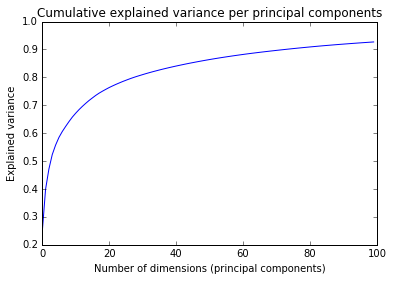

"\n\ntrace1 = Bar(\n        x=['PC %s' %i for i in range(1,5)],\n        y=var_exp,\n        showlegend=False)\n\ntrace2 = Scatter(\n        x=['PC %s' %i for i in range(1,5)], \n        y=cum_var_exp,\n        name='cumulative explained variance')\n\ndata = Data([trace1, trace2])\n\nlayout=Layout(\n        yaxis=YAxis(title='Explained variance in percent'),\n        title='Explained variance by different principal components')\n\nfig = Figure(data=data, layout=layout)\npy.iplot(fig)\n"

In [40]:
#Do some of my own visualization
#- how much information is stored by a given number of dimensions
# Based on the information in the plotly tutorial.

from matplotlib import pyplot as plt

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
y = lambda x, y: int(y[0] - x[0])
eig_pairs.sort(y)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
#    print(i[0])

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


plt.plot(range(100), cum_var_exp[:100])
plt.title("Cumulative explained variance per principal components")
plt.xlabel("Number of dimensions (principal components)")
plt.ylabel("Explained variance")
plt.show()


Let's plot the results

(966, 100)


/Users/ezradavis/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


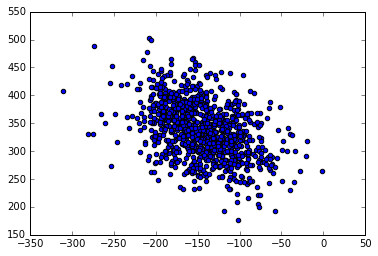

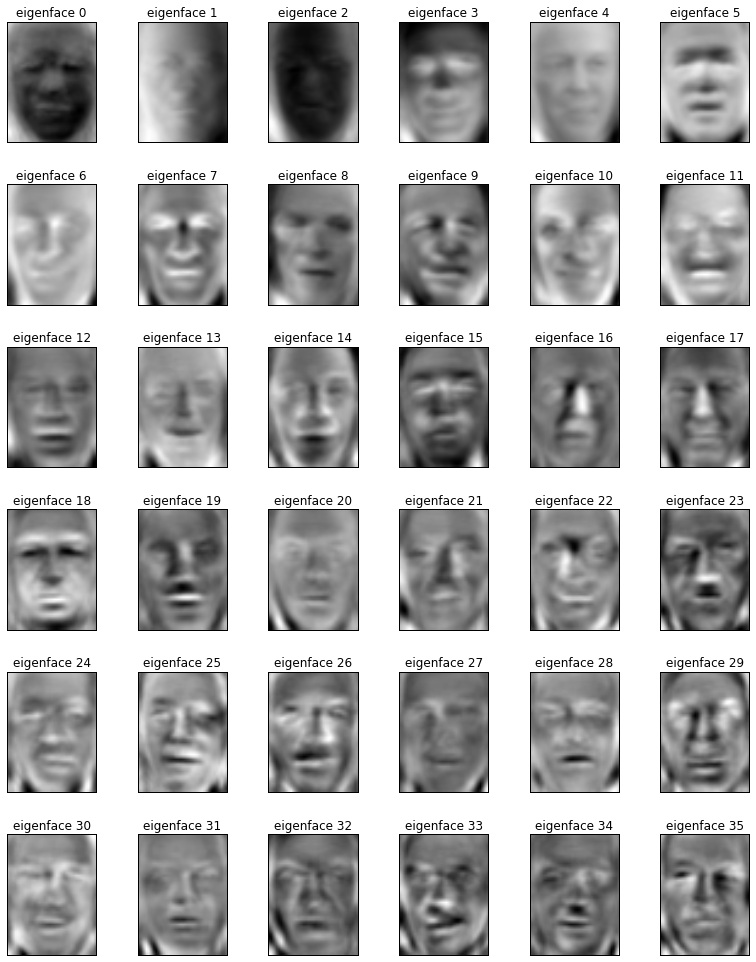

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt

# check the size of the projected matrix
print X_train_pca.shape
# plot the first two components
plt.scatter(X_train_pca_mine[:,0],X_train_pca_mine[:,1])

def plot_gallery(images, titles, h, w, n_row=6, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

# Problem 2 (40 points): implement your own nearest neighbor classifier (kNN)
* Change the following code to implement your own kNN
* The classifier should predict the label base upon $k$ nearest neighbors. $k$ is a parameter.
* The L2 distance should be used.
* You CANNOT  use  any existing function or library for kNN classifier. You need to implement your own version of the kNN.

In [14]:
from collections import Counter

class myNearestNeighbor(object):
    def __init__(self, k=1):
        self.k = k

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        self.Xtr = X
        self.ytr = y
        return self

    def predict(self, X):
        """ X is N x D where each row is an example we wish to predict label for """
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        
        # loop over all test rows
        for i in xrange(num_test):
            # find k nearest training images to the i'th test image
            # using the L2 distance
            
            # Get distances
            distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            predictions = []
            # Find the nearest k images' y values
            for j in range(self.k):
                min_index = np.argmin(distances) # get the index with smallest distance
                distances[min_index] = float("inf")
                predictions.append(self.ytr[min_index])
                
            Ypred[i] =  Counter(predictions).most_common(1)[0][0]# predict the label of the nearest example
        return Ypred

Let's evaluate your classifier and plot the results

Using 4 nearest neighbors:
                   precision    recall  f1-score   support

     Ariel Sharon       0.25      0.31      0.28        13
     Colin Powell       0.77      0.73      0.75        60
  Donald Rumsfeld       0.57      0.48      0.52        27
    George W Bush       0.71      0.92      0.80       146
Gerhard Schroeder       0.88      0.28      0.42        25
      Hugo Chavez       0.75      0.40      0.52        15
       Tony Blair       0.77      0.47      0.59        36

      avg / total       0.71      0.70      0.68       322

[[  4   0   1   7   0   0   1]
 [  3  44   2  10   0   1   0]
 [  2   1  13  10   0   0   1]
 [  2   4   5 134   0   1   0]
 [  5   2   1   7   7   0   3]
 [  0   3   1   4   1   6   0]
 [  0   3   0  16   0   0  17]]


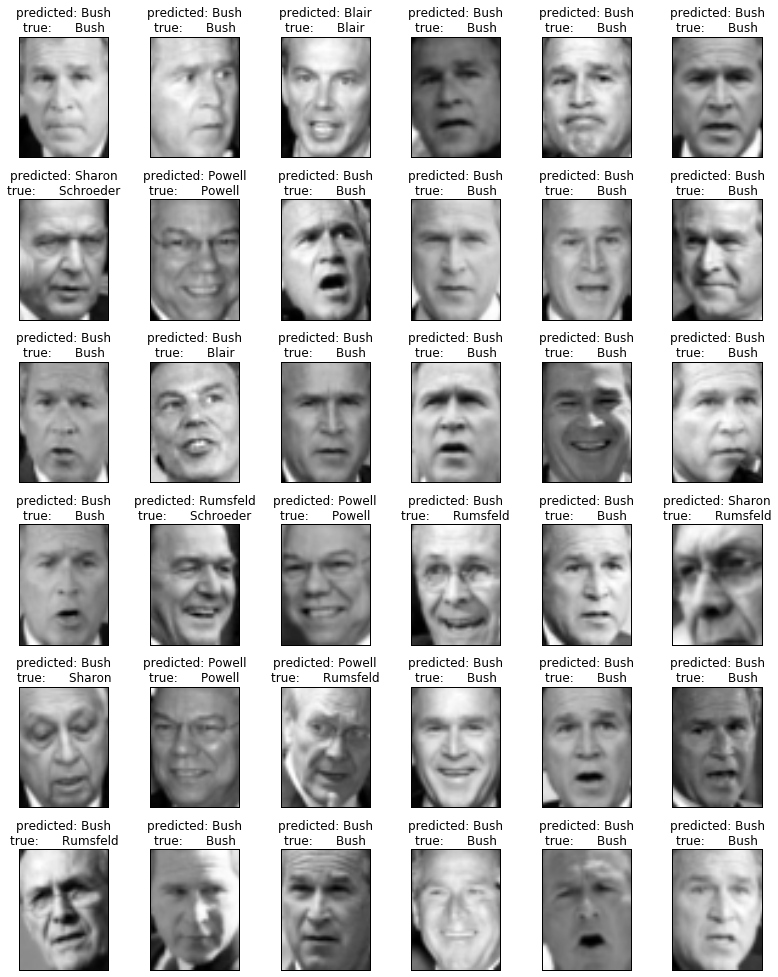

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

n_neighbors = 4
print "Using {:} nearest neighbors:".format(n_neighbors)
clf = myNearestNeighbor(n_neighbors)
clf = clf.train(X_train_pca, y_train)

target_names = dataset.target_names
n_classes = len(set(target_names))

y_pred = clf.predict(X_test_pca)

# evaluate the results
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# Problem 3 (20 points) Model Selection
Use 5-fold cross validation to find the best setting for parameter $k$ of the nearest neighbor classifier on the training data and training labels. Don't use test data or test labels.

In [31]:
import random
import math
k_search_space = range(2,30)

# insert your code 

# Divide X_train and Y_train into k even, random groups
def make_folds(k, X_train=X_train_pca, y_train=y_train):
    length = len(X_train)
    shuffled_indices = random.sample(list(range(length)), length)
    folds_x = []
    folds_y = []
    fold_size = int(math.floor(length / k))
    #if(fold_size * k != length):
    #    print "X_train doesn't split evenly into {:} folds... losing a data point".format(k)
    for i in range(k):
        fold_indices = shuffled_indices[i*fold_size:(i+1)*fold_size]
        folds_x.append([X_train[ind] for ind in  fold_indices])
        folds_y.append([y_train[ind] for ind in  fold_indices])
    return (folds_x, folds_y)

def count_failures(folds):
    k = len(folds[0])
    training_x = np.array(sum(folds[0][0:k-1], []))
    training_y = np.array(sum(folds[1][0:k-1], []))
    clf = myNearestNeighbor(n_neighbors)
    clf = clf.train(training_x, training_y)
    validation_x = np.array(folds[0][-1])
    validation_y = np.array(folds[1][-1])
    y_pred = clf.predict(validation_x)
    failures = 0
    for i in range(len(validation_x)):
        if(y_pred[i] != validation_y[i]):
            failures = failures + 1
    return failures

k_best = 2+np.argmin([count_failures(make_folds(k)) for k in k_search_space])

print("Best parameter k found:%d" % k_best)

Best parameter k found:27


Let's plot the results

/Users/ezradavis/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        13
     Colin Powell       0.96      0.38      0.55        60
  Donald Rumsfeld       0.71      0.19      0.29        27
    George W Bush       0.51      0.99      0.68       146
Gerhard Schroeder       0.00      0.00      0.00        25
      Hugo Chavez       0.00      0.00      0.00        15
       Tony Blair       1.00      0.19      0.33        36

      avg / total       0.58      0.56      0.47       322

[[  0   0   0  13   0   0   0]
 [  0  23   0  37   0   0   0]
 [  1   0   5  21   0   0   0]
 [  0   0   1 145   0   0   0]
 [  0   0   1  24   0   0   0]
 [  0   0   0  15   0   0   0]
 [  0   1   0  28   0   0   7]]


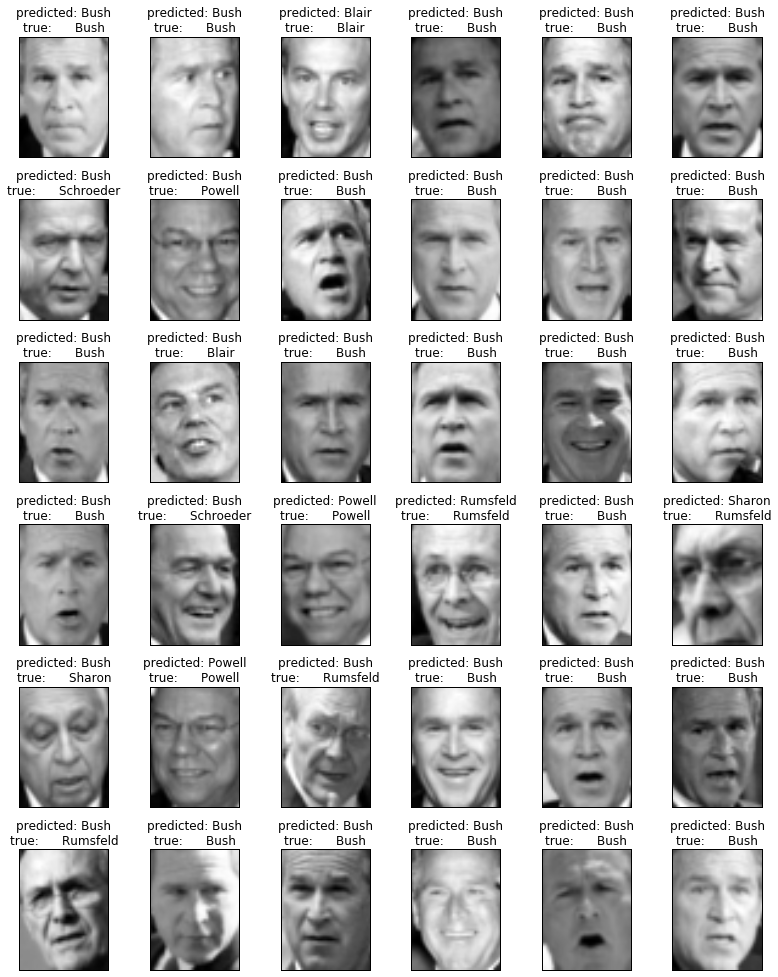

In [32]:
clf = myNearestNeighbor(k_best)
clf = clf.train(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

# evaluate the results
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

# plot the result of the prediction on a portion of the test set
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


** How to submit: **
  Please submit your notebook file through myWPI, in the Assignment "Homework 2".